<a href="https://colab.research.google.com/github/Aya-Hafsi/Epilepsy_Classification_using_ANN/blob/main/Epilepsy_Classification_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
# Necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For model building
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix

In [36]:
from google.colab import files
uploaded = files.upload()

Saving Epilepsy_dataset.csv to Epilepsy_dataset (1).csv


In [37]:
df = pd.read_csv("Epilepsy_dataset.csv")

In [39]:
# Display the first few rows
df.head()

,Age,Gender,Weight,Height,Medication Status,Alcohol or Drug Use,EEG Abnormality Detected,MRI/CT Scan Result,Seizure Frequency,Seizure Duration,...,Flashing Lights Sensitivity,Loud Sound Sensitivity,Missed Medication,Family History of Epilepsy,Head Injury History,Brain Tumor,History of Stroke,Genetic Disorder,Developmental Delay (in Children),Target/Epilepsy Type
0,15,Male,48.3,168.2,On Medication,Yes,Yes,Normal,1,60,...,Yes,Yes,No,No,No,No,No,No,Yes,Generalized
1,4,Female,56.0,174.5,On Medication,No,Yes,Abnormal,1,30,...,No,No,No,Yes,Yes,Yes,No,No,No,Generalized
2,36,Female,44.8,156.2,On Medication,No,Yes,Abnormal,3,30,...,No,Yes,Yes,Yes,No,No,No,No,No,Generalized
3,32,Female,70.4,180.4,Not on Medication,No,Yes,Not Done,0,60,...,Yes,Yes,No,No,No,No,No,No,No,Focal
4,29,Male,54.5,161.7,On Medication,No,Yes,Not Done,1,60,...,No,Yes,No,Yes,No,Yes,No,No,No,Generalized


In [40]:
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Age                                  0
Gender                               0
Weight                               0
Height                               0
Medication Status                    0
Alcohol or Drug Use                  0
EEG Abnormality Detected             0
MRI/CT Scan Result                   0
Seizure Frequency                    0
Seizure Duration                     0
Seizure Type                         0
Aura Before Seizure                  0
Loss of Consciousness                0
Muscle Stiffness                     0
Jerky Movements                      0
Postictal Confusion                  0
Blank Stare Episodes                 0
Eye Rolling                          0
Stress or Anxiety Before Episode     0
Lack of Sleep Before Episode         0
Flashing Lights Sensitivity          0
Loud Sound Sensitivity               0
Missed Medication                    0
Family History of Epilepsy           0
Head Injury History                 

In [41]:
# Quick statistics overview
df.describe(include='all')

,Age,Gender,Weight,Height,Medication Status,Alcohol or Drug Use,EEG Abnormality Detected,MRI/CT Scan Result,Seizure Frequency,Seizure Duration,...,Flashing Lights Sensitivity,Loud Sound Sensitivity,Missed Medication,Family History of Epilepsy,Head Injury History,Brain Tumor,History of Stroke,Genetic Disorder,Developmental Delay (in Children),Target/Epilepsy Type
count,4856.000000,4856,4856.000000,4856.000000,4856,4856,4856,4856,4856.000000,4856.000000,...,4856,4856,4856,4856,4856,4856,4856,4856,4856,4856
unique,NaN,3,NaN,NaN,2,2,2,3,NaN,NaN,...,2,2,2,2,2,2,2,2,2,6
top,NaN,Male,NaN,NaN,On Medication,No,Yes,Normal,NaN,NaN,...,No,No,No,No,No,No,No,No,No,Generalized
freq,NaN,2677,NaN,NaN,3617,4300,4136,2383,NaN,NaN,...,2432,2899,3920,3082,3840,4625,4341,4127,4644,2047
mean,40.790362,NaN,65.026030,165.406343,NaN,NaN,NaN,NaN,1.967875,59.592257,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,22.954460,NaN,15.312839,10.135879,NaN,NaN,NaN,NaN,2.395971,29.888887,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,5.900000,127.700000,NaN,NaN,NaN,NaN,0.000000,30.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,20.000000,NaN,54.600000,158.300000,NaN,NaN,NaN,NaN,0.000000,30.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,41.000000,NaN,65.100000,165.500000,NaN,NaN,NaN,NaN,1.000000,60.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,61.000000,NaN,75.500000,172.600000,NaN,NaN,NaN,NaN,3.000000,90.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
# Encoding categorical variables
df = pd.get_dummies(df, drop_first=True)

# Display the first few rows after encoding
df.head()

,Age,Weight,Height,Seizure Frequency,Seizure Duration,Gender_Male,Gender_Other,Medication Status_On Medication,Alcohol or Drug Use_Yes,EEG Abnormality Detected_Yes,...,Head Injury History_Yes,Brain Tumor_Yes,History of Stroke_Yes,Genetic Disorder_Yes,Developmental Delay (in Children)_Yes,Target/Epilepsy Type_Complicated,Target/Epilepsy Type_Focal,Target/Epilepsy Type_Generalized,Target/Epilepsy Type_Normal,Target/Epilepsy Type_Not Confirmed
0,15,48.3,168.2,1,60,True,False,True,True,True,...,False,False,False,False,True,False,False,True,False,False
1,4,56.0,174.5,1,30,False,False,True,False,True,...,True,True,False,False,False,False,False,True,False,False
2,36,44.8,156.2,3,30,False,False,True,False,True,...,False,False,False,False,False,False,False,True,False,False
3,32,70.4,180.4,0,60,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
4,29,54.5,161.7,1,60,True,False,True,False,True,...,False,True,False,False,False,False,False,True,False,False


In [43]:
# Step 4: Separating features and labels
X = df.drop(columns=['Target/Epilepsy Type_Complicated',
                     'Target/Epilepsy Type_Focal',
                     'Target/Epilepsy Type_Generalized',
                     'Target/Epilepsy Type_Normal',
                     'Target/Epilepsy Type_Not Confirmed'])

y = df[['Target/Epilepsy Type_Complicated',
        'Target/Epilepsy Type_Focal',
        'Target/Epilepsy Type_Generalized',
        'Target/Epilepsy Type_Normal',
        'Target/Epilepsy Type_Not Confirmed']]

In [44]:
# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [45]:
# Convert scaled features back to a DataFrame for easier visualization
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
# Display the first few rows of the scaled data
X_scaled.head()

,Age,Weight,Height,Seizure Frequency,Seizure Duration,Gender_Male,Gender_Other,Medication Status_On Medication,Alcohol or Drug Use_Yes,EEG Abnormality Detected_Yes,...,Lack of Sleep Before Episode_Yes,Flashing Lights Sensitivity_Yes,Loud Sound Sensitivity_Yes,Missed Medication_Yes,Family History of Epilepsy_Yes,Head Injury History_Yes,Brain Tumor_Yes,History of Stroke_Yes,Genetic Disorder_Yes,Developmental Delay (in Children)_Yes
0,-1.123660,-1.092400,0.275649,-0.404001,0.013643,0.902203,-0.134273,0.585277,2.780973,0.41723,...,0.649265,1.001649,1.217107,-0.488647,-0.758683,-0.514377,-0.223486,-0.344436,-0.420288,4.680348
1,-1.602919,-0.589503,0.897267,-0.404001,-0.990178,-1.108398,-0.134273,0.585277,-0.359586,0.41723,...,-1.540202,-0.998354,-0.821621,-0.488647,1.318073,1.944101,4.474555,-0.344436,-0.420288,-0.213659
2,-0.208711,-1.320990,-0.908386,0.430820,-0.990178,-1.108398,-0.134273,0.585277,-0.359586,0.41723,...,-1.540202,-0.998354,1.217107,2.046469,1.318073,-0.514377,-0.223486,-0.344436,-0.420288,-0.213659
3,-0.382987,0.350982,1.479418,-0.821411,0.013643,-1.108398,-0.134273,-1.708593,-0.359586,0.41723,...,0.649265,1.001649,1.217107,-0.488647,-0.758683,-0.514377,-0.223486,-0.344436,-0.420288,-0.213659
4,-0.513694,-0.687470,-0.365703,-0.404001,0.013643,0.902203,-0.134273,0.585277,-0.359586,0.41723,...,-1.540202,-0.998354,1.217107,-0.488647,1.318073,-0.514377,4.474555,-0.344436,-0.420288,-0.213659


In [46]:
# Step 6: Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
# Check the shape of the resulting sets
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

Training data shape: (3884, 33)
Test data shape: (972, 33)


In [47]:
# Building the model
model = Sequential()

# Input layer (equal to the number of features)
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))

# Hidden layer
model.add(Dense(units=32, activation='relu'))

# Output layer (5 output classes for the epilepsy type)
model.add(Dense(units=5, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [48]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [49]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5483 - loss: 0.9850 - val_accuracy: 0.6955 - val_loss: 0.6304
Epoch 2/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7123 - loss: 0.5694 - val_accuracy: 0.7335 - val_loss: 0.5457
Epoch 3/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7572 - loss: 0.4445 - val_accuracy: 0.7191 - val_loss: 0.5269
Epoch 4/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7299 - loss: 0.4660 - val_accuracy: 0.7222 - val_loss: 0.5498
Epoch 5/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7321 - loss: 0.4676 - val_accuracy: 0.6800 - val_loss: 0.6401
Epoch 6/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7233 - loss: 0.5646 - val_accuracy: 0.7181 - val_loss: 0.7488
Epoch 7/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7214 - loss: 0.6289 - val_accuracy: 0.6667 - val_loss: 0.8606
Epoch 8/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6938 - loss: 0.7787 - val_accuracy: 0.

In [50]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6638 - loss: 1.7193


In [51]:
# Print test results
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Test Loss: 1.8620628118515015
Test Accuracy: 0.6471193432807922


In [52]:
# Visualize the training process (loss and accuracy)
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

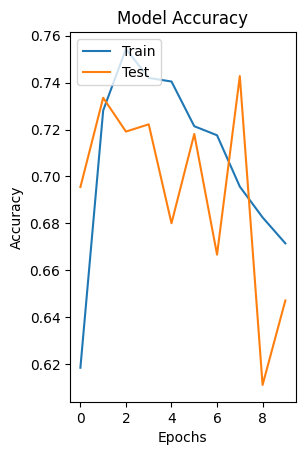

In [53]:
# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

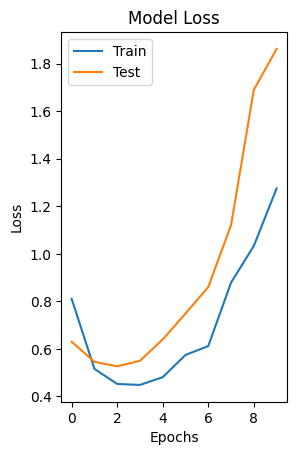

In [54]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

In [57]:
# Train the model with more epochs (20 instead of 10)
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5516 - loss: 9.5224 - val_accuracy: 0.5412 - val_loss: 17.6752
Epoch 2/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5629 - loss: 11.4251 - val_accuracy: 0.6595 - val_loss: 12.7494
Epoch 3/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5782 - loss: 10.2784 - val_accuracy: 0.5031 - val_loss: 11.9972
Epoch 4/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5513 - loss: 16.0347 - val_accuracy: 0.5638 - val_loss: 13.7936
Epoch 5/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5502 - loss: 12.3837 - val_accuracy: 0.6903 - val_loss: 8.9932
Epoch 6/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5424 - loss: 13.5682 - val_accuracy: 0.5340 - val_loss: 16.2898
Epoch 7/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5162 - loss: 19.2818 - val_accuracy: 0.5802 - val_loss: 24.1972
Epoch 8/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5375 - loss: 15.4769 - val

In [58]:
# Evaluate the model on the test data again
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Print test results
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5050 - loss: 10.8005
Test Loss: 11.542122840881348
Test Accuracy: 0.4927983582019806


In [64]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [65]:
# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [66]:
# Rebuild the model with Dropout layers
model = Sequential()

In [67]:
# Input layer
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.2))  # Drop 20% of the neurons

# Hidden layer
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.2))  # Drop 20% of the neurons

# Output layer
model.add(Dense(units=5, activation='softmax'))

In [68]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [69]:
# Train the model with early stopping and dropout
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3331 - loss: 1.4930 - val_accuracy: 0.6512 - val_loss: 0.7086
Epoch 2/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6431 - loss: 0.7496 - val_accuracy: 0.6944 - val_loss: 0.5885
Epoch 3/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6940 - loss: 0.6426 - val_accuracy: 0.7181 - val_loss: 0.5862
Epoch 4/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6410 - loss: 0.9629 - val_accuracy: 0.7006 - val_loss: 0.8063
Epoch 5/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6245 - loss: 2.2635 - val_accuracy: 0.6883 - val_loss: 1.2618
Epoch 6/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6235 - loss: 4.1400 - val_accuracy: 0.7346 - val_loss: 1.9957


In [70]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Print test results
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7257 - loss: 0.5801 
Test Loss: 0.5862349271774292
Test Accuracy: 0.7181069850921631


In [71]:
# Visualize the training process (loss and accuracy)
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

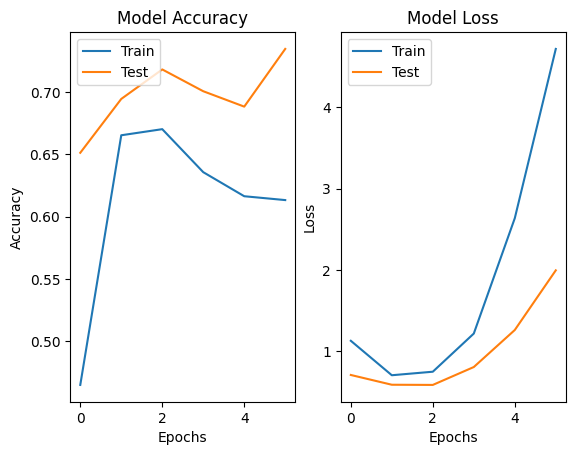

In [72]:
# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

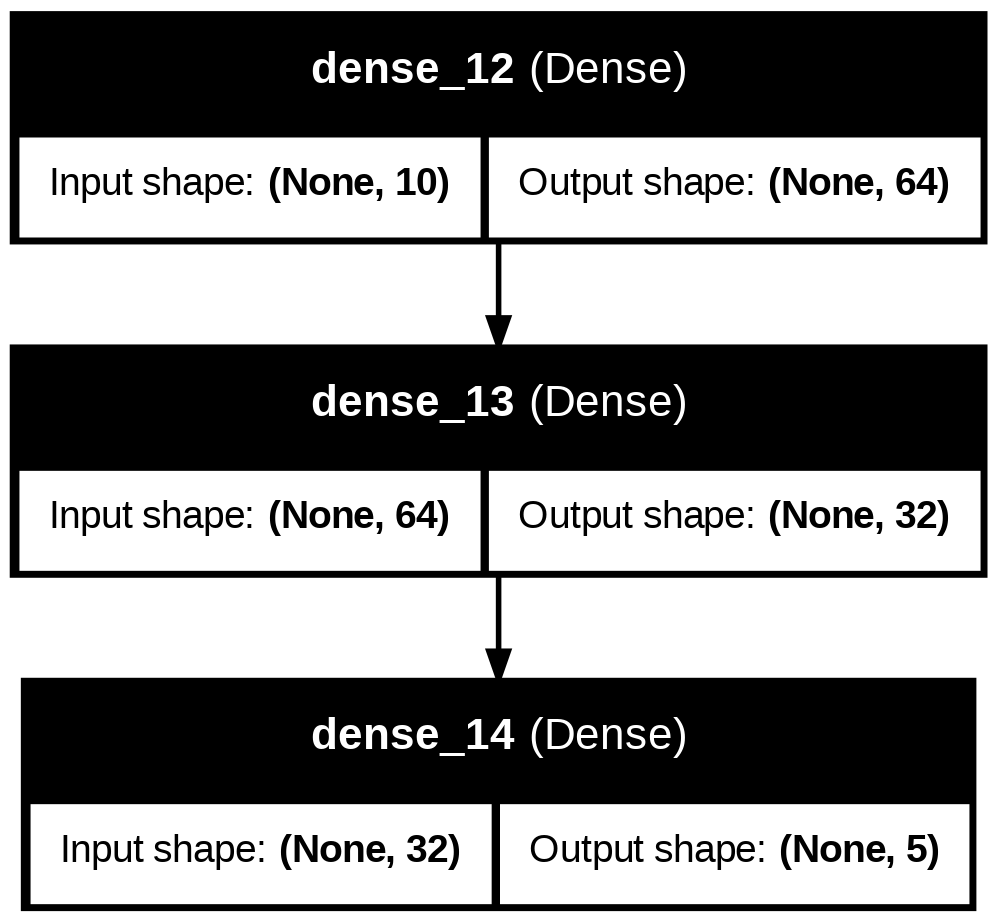

In [78]:
from tensorflow.keras.utils import plot_model

# Visualize the model architecture
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

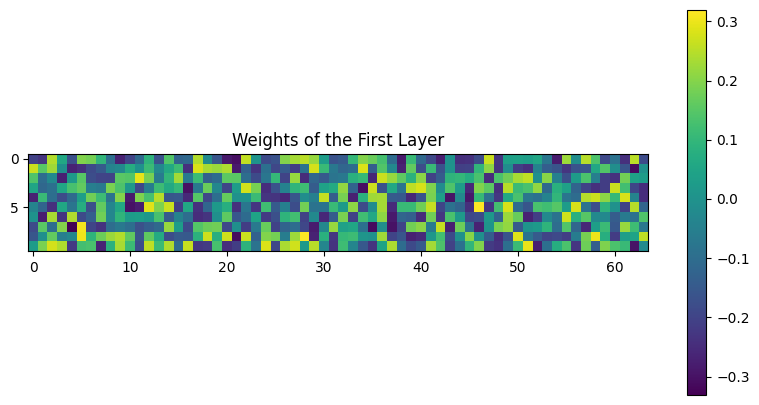

In [86]:
# Get the weights of the first layer (you can change the layer index)
weights, biases = model.layers[0].get_weights()

# Visualize the weights of the first layer
plt.figure(figsize=(10, 5))
plt.imshow(weights, cmap='viridis')  # This will visualize the weight matrix
plt.title("Weights of the First Layer")
plt.colorbar()
plt.show()